In [156]:
# Importing the required models 
import numpy as np
import pandas as pd
import math
import os
import seaborn as sn
import glob
#from google.colab import drive
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, GlobalAveragePooling1D, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from keras import optimizers
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


In [76]:
# Reading Flight data
flight_data = pd.read_csv('New Refined data.csv')

In [77]:
flight_data

,FROM_JFK,TO JFK,SCHEDULED_DEPARTURE_TIME,FEDERAL_HOLIDAY,STATE_HOLIDAY,WEEKEND,LONG_WEEKEND,WIND_DIRECTION,WIND SPEED,ALTIMETER,...,ARRIVAL_TIME,SCHEDULED_TIME,ELAPSED_TIME,DEPARTURE_DELAY,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,0,1,0.08,1,0,0,0,250,12,30.16,...,0.21,235,248,0,1,0,0,0,0,0
1,0,1,0.23,1,0,0,0,270,12,30.16,...,0.28,88,78,0,0,0,0,0,0,0
2,1,0,0.23,1,0,0,0,270,12,30.16,...,0.44,225,201,1,1,0,0,1,0,0
3,1,0,0.24,1,0,0,0,270,12,30.16,...,0.42,185,199,1,1,1,0,1,0,0
4,0,1,0.25,1,0,0,0,260,14,30.18,...,0.36,154,164,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34037,1,0,0.42,0,0,0,0,0,0,30.32,...,0.52,347,338,0,0,0,0,0,0,0
34038,0,1,0.42,0,0,0,0,0,0,30.32,...,0.59,212,196,0,0,0,0,0,0,0
34039,1,0,0.42,0,0,0,0,0,0,30.32,...,0.54,395,370,0,0,0,0,0,0,0
34040,0,1,0.42,0,0,0,0,0,0,30.32,...,0.47,89,81,0,0,0,0,0,0,0


In [78]:
flight_data.info()
print(flight_data.shape)
print(flight_data.columns)
pd.isnull(flight_data).sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34042 entries, 0 to 34041
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   FROM_JFK                  34042 non-null  int64  
 1   TO JFK                    34042 non-null  int64  
 2   SCHEDULED_DEPARTURE_TIME  34042 non-null  float64
 3   FEDERAL_HOLIDAY           34042 non-null  int64  
 4   STATE_HOLIDAY             34042 non-null  int64  
 5   WEEKEND                   34042 non-null  int64  
 6   LONG_WEEKEND              34042 non-null  int64  
 7   WIND_DIRECTION            34042 non-null  int64  
 8   WIND SPEED                34042 non-null  int64  
 9   ALTIMETER                 34042 non-null  float64
 10  0.0slp                    34042 non-null  float64
 11  t0.0pc                    34042 non-null  float64
 12  VISIBILITY                34042 non-null  float64
 13  DEPARTURE_TIME            34042 non-null  float64
 14  SCHEDU

FROM_JFK                    0
TO JFK                      0
SCHEDULED_DEPARTURE_TIME    0
FEDERAL_HOLIDAY             0
STATE_HOLIDAY               0
WEEKEND                     0
LONG_WEEKEND                0
WIND_DIRECTION              0
WIND SPEED                  0
ALTIMETER                   0
0.0slp                      0
t0.0pc                      0
VISIBILITY                  0
DEPARTURE_TIME              0
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME                0
SCHEDULED_TIME              0
ELAPSED_TIME                0
DEPARTURE_DELAY             0
ARRIVAL_DELAY               0
AIR_SYSTEM_DELAY            0
SECURITY_DELAY              0
AIRLINE_DELAY               0
LATE_AIRCRAFT_DELAY         0
WEATHER_DELAY               0
dtype: int64

In [79]:
flight_data = flight_data.fillna(int(0))

In [80]:
# Data cleaning Filling in 1(JFK) and 0(REST)
for i in range(flight_data.shape[0]):
  code = str(flight_data.iloc[i, 1])
  if code == 'JFK':
    flight_data.iloc[i, 1] = int(1)
  else:
    flight_data.iloc[i, 1] = int(0)
    
for i in range(flight_data.shape[0]):
  code = str(flight_data.iloc[i, 2])
  if code == 'JFK':
    flight_data.iloc[i, 2] = int(1)
  else:
    flight_data.iloc[i, 2] = int(0)

In [81]:
flight_data.head()

,FROM_JFK,TO JFK,SCHEDULED_DEPARTURE_TIME,FEDERAL_HOLIDAY,STATE_HOLIDAY,WEEKEND,LONG_WEEKEND,WIND_DIRECTION,WIND SPEED,ALTIMETER,...,ARRIVAL_TIME,SCHEDULED_TIME,ELAPSED_TIME,DEPARTURE_DELAY,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,0,0,0.0,1,0,0,0,250,12,30.16,...,0.21,235,248,0,1,0,0,0,0,0
1,0,0,0.0,1,0,0,0,270,12,30.16,...,0.28,88,78,0,0,0,0,0,0,0
2,1,0,0.0,1,0,0,0,270,12,30.16,...,0.44,225,201,1,1,0,0,1,0,0
3,1,0,0.0,1,0,0,0,270,12,30.16,...,0.42,185,199,1,1,1,0,1,0,0
4,0,0,0.0,1,0,0,0,260,14,30.18,...,0.36,154,164,0,1,0,0,0,0,0


In [82]:
#dropesh = ['AIRLINE']
#flight_data = flight_data.drop(dropesh, axis = 1)

In [83]:
flight_data[['FROM_JFK', 'TO JFK', 'FEDERAL_HOLIDAY', 'STATE_HOLIDAY', 'WEEKEND', 'LONG_WEEKEND']] = flight_data[['FROM_JFK', 'TO JFK', 'FEDERAL_HOLIDAY', 'STATE_HOLIDAY', 'WEEKEND', 'LONG_WEEKEND']].apply(pd.to_numeric)

In [84]:
flight_data.columns

Index(['FROM_JFK', 'TO JFK', 'SCHEDULED_DEPARTURE_TIME', 'FEDERAL_HOLIDAY',
       'STATE_HOLIDAY', 'WEEKEND', 'LONG_WEEKEND', 'WIND_DIRECTION',
       'WIND SPEED ', 'ALTIMETER', '0.0slp', 't0.0pc', 'VISIBILITY',
       'DEPARTURE_TIME', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'SCHEDULED_TIME',
       'ELAPSED_TIME', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY'],
      dtype='object')

In [85]:
# Giving the y values for all 7 output columns
for col_no in range(18, 25):
  for i in range(flight_data.shape[0]):
    value = flight_data.iloc[i, col_no]
    if value > 0:
      flight_data.iloc[i, col_no] = int(1)
    else:
      flight_data.iloc[i, col_no] = int(0)

In [86]:
flight_data.head()

,FROM_JFK,TO JFK,SCHEDULED_DEPARTURE_TIME,FEDERAL_HOLIDAY,STATE_HOLIDAY,WEEKEND,LONG_WEEKEND,WIND_DIRECTION,WIND SPEED,ALTIMETER,...,ARRIVAL_TIME,SCHEDULED_TIME,ELAPSED_TIME,DEPARTURE_DELAY,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,0,0,0.0,1,0,0,0,250,12,30.16,...,0.21,235,248,0,1,0,0,0,0,0
1,0,0,0.0,1,0,0,0,270,12,30.16,...,0.28,88,78,0,0,0,0,0,0,0
2,1,0,0.0,1,0,0,0,270,12,30.16,...,0.44,225,201,1,1,0,0,1,0,0
3,1,0,0.0,1,0,0,0,270,12,30.16,...,0.42,185,199,1,1,1,0,1,0,0
4,0,0,0.0,1,0,0,0,260,14,30.18,...,0.36,154,164,0,1,0,0,0,0,0


In [87]:
X = flight_data.copy(deep = True)
test = X.columns[18:]
X.shape
X = X.drop(test, axis = 1)
Y = flight_data[test]

In [88]:
X = np.array(X)
Y = np.array(Y)

In [89]:
# Test train split of the data 
X_train, X_dev, Y_train, Y_dev = train_test_split(X, Y, test_size = 0.25, random_state = 777)
X_dev, X_test, Y_dev, Y_test = train_test_split(X_dev, Y_dev, test_size = 0.4, random_state = 777)

In [90]:
print(X_test.shape, Y_test.shape)
print(X_dev.shape, Y_dev.shape)
print(X_train.shape, (Y_train.shape))

(3405, 18) (3405, 7)
(5106, 18) (5106, 7)
(25531, 18) (25531, 7)


RANDOM FOREST

In [91]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_dev = sc.transform(X_dev)

In [92]:
# Random forest Implementation
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, Y_train)
y_pred = regressor.predict(X_dev)

In [93]:
# Error measurements
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_dev, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_dev, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_dev, y_pred)))

Mean Absolute Error: 0.13662124857776953
Mean Squared Error: 0.06781768958399358
Root Mean Squared Error: 0.2604182973294956


In [94]:
def classificationReport(model_name, test_set, truth_labels):
    predicted_Classes = model_name.predict(test_set)
    arr = predicted_Classes.flatten()
    arr = arr.astype('int')
    y_t = truth_labels.flatten()
    y_t = np.array(y_t,dtype='int')
    report = classification_report(y_t, arr)
    return(print(report))

In [95]:
# Classification measurement report
classificationReport(regressor, X_dev, Y_dev)

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     28332
           1       0.98      0.18      0.31      7410

    accuracy                           0.83     35742
   macro avg       0.90      0.59      0.61     35742
weighted avg       0.86      0.83      0.78     35742



TEST SET

In [97]:
# Test data
X_test = sc.transform(X_test)
y_test_pred = regressor.predict(X_test)

In [98]:
# Error measurements
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_test_pred)))

Mean Absolute Error: 0.13618243479476977
Mean Squared Error: 0.06660629355755981
Root Mean Squared Error: 0.2580819512433208


In [96]:
# Classification measurement report
classificationReport(regressor, X_test, Y_test)

              precision    recall  f1-score   support

           0       0.79      1.00      0.88     18893
           1       0.51      0.01      0.02      4942

    accuracy                           0.79     23835
   macro avg       0.65      0.50      0.45     23835
weighted avg       0.73      0.79      0.70     23835



VISUALIZING OUR FOREST

In [120]:
from sklearn.tree import export_graphviz
import pydot

In [121]:
# Dropping output columns 
tele = (flight_data.columns)
temp = ['DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY']
feature = tele.drop(temp)

I did conversion from dot file to png online 

Smaller Forest

In [144]:
# Implementing smaller forest 
regressorsm = RandomForestRegressor(n_estimators=10, max_depth=3, random_state=0)
regressorsm.fit(X_train, Y_train)
y_predsm = regressorsm.predict(X_dev)

In [149]:
y_test_predsm = regressorsm.predict(X_test)

In [150]:
# Picking the smallest tree
treesm = regressorsm.estimators_[5]

In [151]:
# Conversion to dot file
export_graphviz(treesm, out_file = 'treesm.dot', feature_names = feature, rounded = True, precision = 1)


In [152]:
(graph, ) = pydot.graph_from_dot_file('treesm.dot')

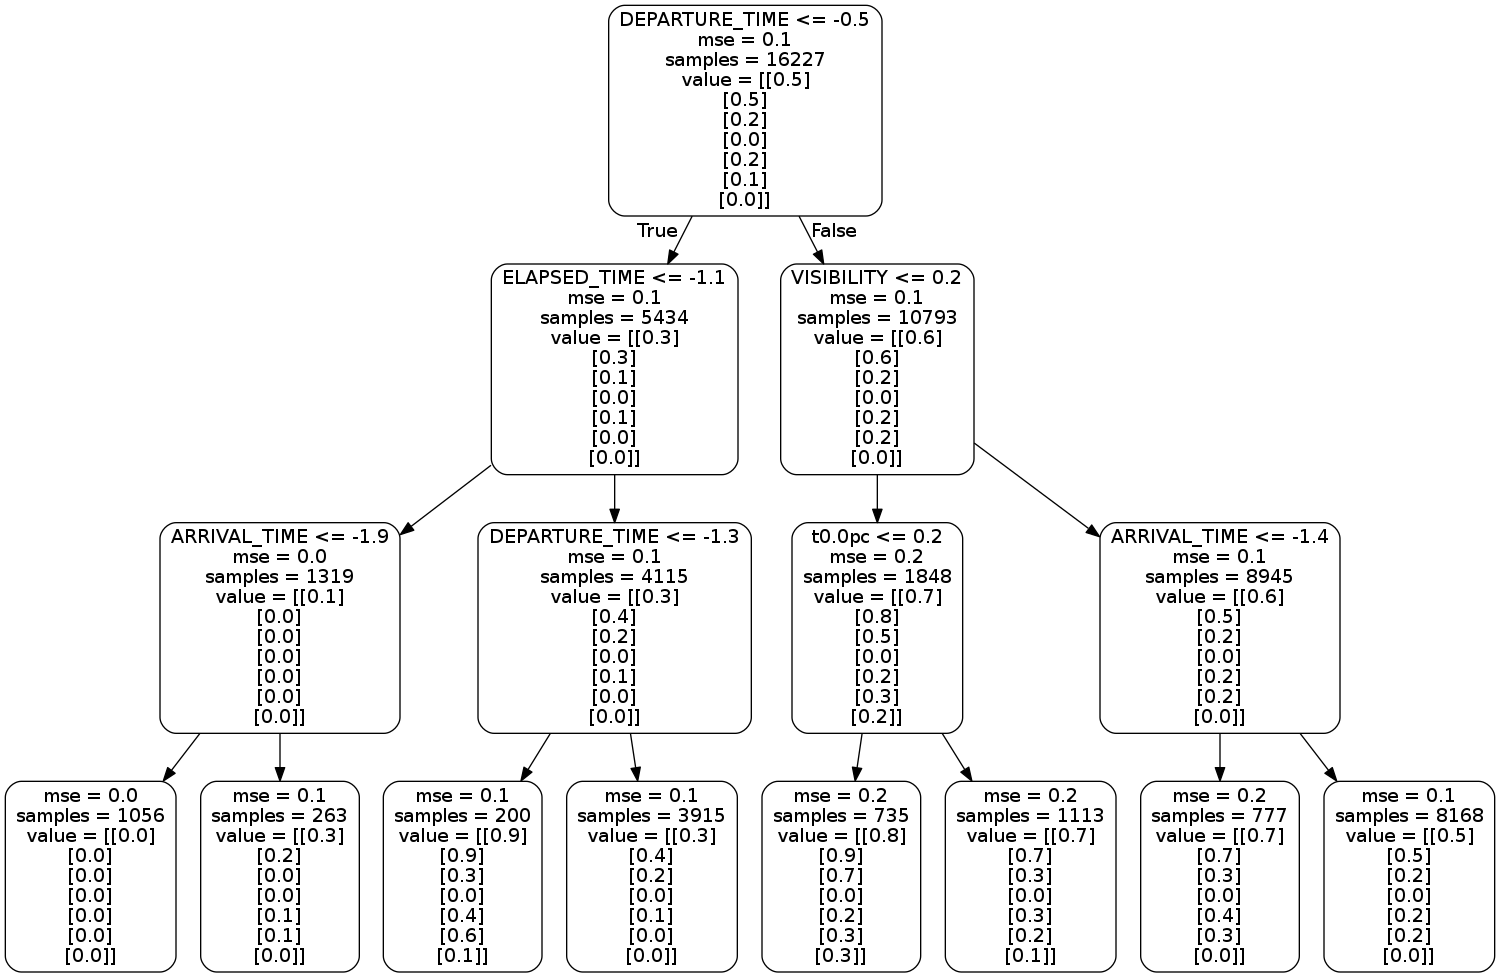

In [153]:
# Conversion and displaying the png format of tree
from IPython.display import Image
Image(filename='treesm.png') 